# About
## Methodology
As proposed on the CRISP-ML(Q) documentation, the first step is to have a general business and data understanding, then using the MLOps approach, the process to automate most of the model creation part is followed.
## Business and Data Understanding
 heart disease is a leading cause of death for people of most races in the U.S. (African Americans, American Indians and Alaska Natives, and whites). About half of all Americans (47%) have at least 1 of 3 major risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetes status, obesity (high BMI), not getting enough physical activity, or drinking too much alcohol. Identifying and preventing the factors that have the greatest impact on heart disease is very important in healthcare. In turn, developments in computing allow the application of machine learning methods to detect "patterns" in the data that can predict a patient's condition.
 One of every 3 women are at risk of suffering a heart disease.
 
This dataset is part of the Behavioral Risk Factor Surveillance System (BRFSS) from the CDC, which conducts annual telephone surveys to collect data on the health status of U.S resudents: "Established on 1984 with 15 states, BRFSS now collects data in all 15 states, the District of Columbia, and three U.S. territories, BRFSS completes more than 400,000 adult interviews each year, making it the largest continuosly conducted health survey sistem in the world".
### Business Objectives
- To have a tool to identify women at high risk of myocardial infarction.
### ML Objectives
- Have more than 85% on the model precision and specification.
- Explore and preprocess data for classification models.
### Algorithms
- Support Vector Machine
## TODO:
- Collect and verify data
- Assess the project feasibility.
- Create POC (Proof of Concept)
- Nominal

In [1]:
#!pip install pandas
#!pip install scikit-learn
#!pip install matplotlib
#!pip install sklearn

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Modeling
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Metrics
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import chi2, VarianceThreshold, SelectKBest
from sklearn.feature_selection import f_classif, RFE
# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import decomposition, pipeline

# Data Loading

In [3]:
# Importamos el dataset para iniciar el análisis
w_heart_b = pd.read_csv("heart_2020_woman_balanced.csv")# Visualizamos los primeros 5 datos del dataset
w_heart_b.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,29.18,No,No,No,1,0,No,50-54,White,No,Yes,Very good,6,No,No,No
1,No,36.58,No,No,No,0,0,No,60-64,White,Yes,No,Good,5,No,No,Yes
2,No,31.09,No,No,No,2,0,No,65-69,White,No,Yes,Very good,7,No,No,No
3,No,26.63,No,No,No,20,0,No,65-69,White,No,Yes,Fair,6,No,Yes,No
4,No,19.47,Yes,No,No,0,10,No,65-69,White,No,Yes,Very good,8,No,No,No


# Data Understanding
## Summary of Numerical Features

In [4]:
w_heart_b.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,22460.0,28.690503,7.040198,12.4,23.69,27.44,32.28,82.42
PhysicalHealth,22460.0,6.126759,10.379701,0.0,0.00,0.00,7.00,30.00
MentalHealth,22460.0,5.296750,9.260283,0.0,0.00,0.00,5.00,30.00
SleepTime,22460.0,7.100980,1.663576,1.0,6.00,7.00,8.00,24.00


## Summary of Categorical Features

In [5]:
w_heart_b.describe(include = 'object').style.set_properties(**{'color': 'white','border-color': 'white'})

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,22460,22460,22460,22460,22460,22460,22460,22460,22460,22460,22460,22460,22460
unique,2,2,2,2,2,13,6,4,2,5,2,2,2
top,Yes,No,No,No,No,80 or older,White,No,Yes,Good,No,No,No
freq,11234,12548,21271,20131,15757,3534,17360,16846,15030,7047,18079,20474,19824


## Dependent Feature: Heart Disease distribution

In [6]:
print(w_heart_b.groupby('HeartDisease').size())

HeartDisease
No     11226
Yes    11234
dtype: int64


## Dataset information

In [7]:
w_heart_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22460 entries, 0 to 22459
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      22460 non-null  object 
 1   BMI               22460 non-null  float64
 2   Smoking           22460 non-null  object 
 3   AlcoholDrinking   22460 non-null  object 
 4   Stroke            22460 non-null  object 
 5   PhysicalHealth    22460 non-null  int64  
 6   MentalHealth      22460 non-null  int64  
 7   DiffWalking       22460 non-null  object 
 8   AgeCategory       22460 non-null  object 
 9   Race              22460 non-null  object 
 10  Diabetic          22460 non-null  object 
 11  PhysicalActivity  22460 non-null  object 
 12  GenHealth         22460 non-null  object 
 13  SleepTime         22460 non-null  int64  
 14  Asthma            22460 non-null  object 
 15  KidneyDisease     22460 non-null  object 
 16  SkinCancer        22460 non-null  object

## Unique values by each categorical feature
### Qualitative variables can be Nominal or Ordinal (Order)
### Code explanation
- Pandas Series object is a one dimensional labeled array
- The syntaxis { c : ... } is a dictionary comprehension. It iterates over each column 'c' in the dataframe and for each column it creates a key-value pain in the dictionary where the key is the column name 'c' and the value is an array of unique values from that column.
- The brackets {} means youre declaring a Dictionary or a Set
- Set items are unordered, unchangeable, and do not allow duplicate values.
- List, Tuple and Dictionary

In [8]:
object_columns = w_heart_b.select_dtypes(include='object')
pd.Series({c: sorted(w_heart_b[c].unique()) for c in object_columns})

HeartDisease                                                [No, Yes]
Smoking                                                     [No, Yes]
AlcoholDrinking                                             [No, Yes]
Stroke                                                      [No, Yes]
DiffWalking                                                 [No, Yes]
AgeCategory         [18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-...
Race                [American Indian/Alaskan Native, Asian, Black,...
Diabetic            [No, No, borderline diabetes, Yes, Yes (during...
PhysicalActivity                                            [No, Yes]
GenHealth                    [Excellent, Fair, Good, Poor, Very good]
Asthma                                                      [No, Yes]
KidneyDisease                                               [No, Yes]
SkinCancer                                                  [No, Yes]
dtype: object

## Values distribution by each numerical value
### Quantitative variables can be discrete and continuous
- Only particular numbers
- Any numeric value

In [9]:
object_columns = w_heart_b.select_dtypes(include=[np.number])
pd.Series({c: sorted(w_heart_b[c].unique()) for c in object_columns})

BMI               [12.4, 12.48, 12.84, 13.25, 13.44, 13.53, 13.6...
PhysicalHealth    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
MentalHealth      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
SleepTime         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dtype: object

## Exploratory Analysis
In this step a df dataframe variable is going to be used instead of w_heart_b
### Categorical Features 

In [10]:
# Get the ordered age categories
age_categories = sorted(w_heart_b["AgeCategory"].unique())
heart_disease_options = w_heart_b["HeartDisease"].unique()
def compute():
    dicc = {}
    for v in heart_disease_options:
        dicc[v] = {c: w_heart_b[(w_heart_b["HeartDisease"]==v) & (w_heart_b["AgeCategory"]==c)]["AgeCategory"].count() for c in age_categories}
    return dicc 
ages_count = compute()
ages_count_yes, ages_count_no = (ages_count["Yes"], ages_count["No"])
print(ages_count_yes, ages_count_no)

{'18-24': 50, '25-29': 66, '30-34': 99, '35-39': 148, '40-44': 243, '45-49': 320, '50-54': 596, '55-59': 908, '60-64': 1257, '65-69': 1467, '70-74': 1810, '75-79': 1642, '80 or older': 2628} {'18-24': 666, '25-29': 560, '30-34': 638, '35-39': 731, '40-44': 777, '45-49': 765, '50-54': 873, '55-59': 1025, '60-64': 1193, '65-69': 1182, '70-74': 1126, '75-79': 784, '80 or older': 906}


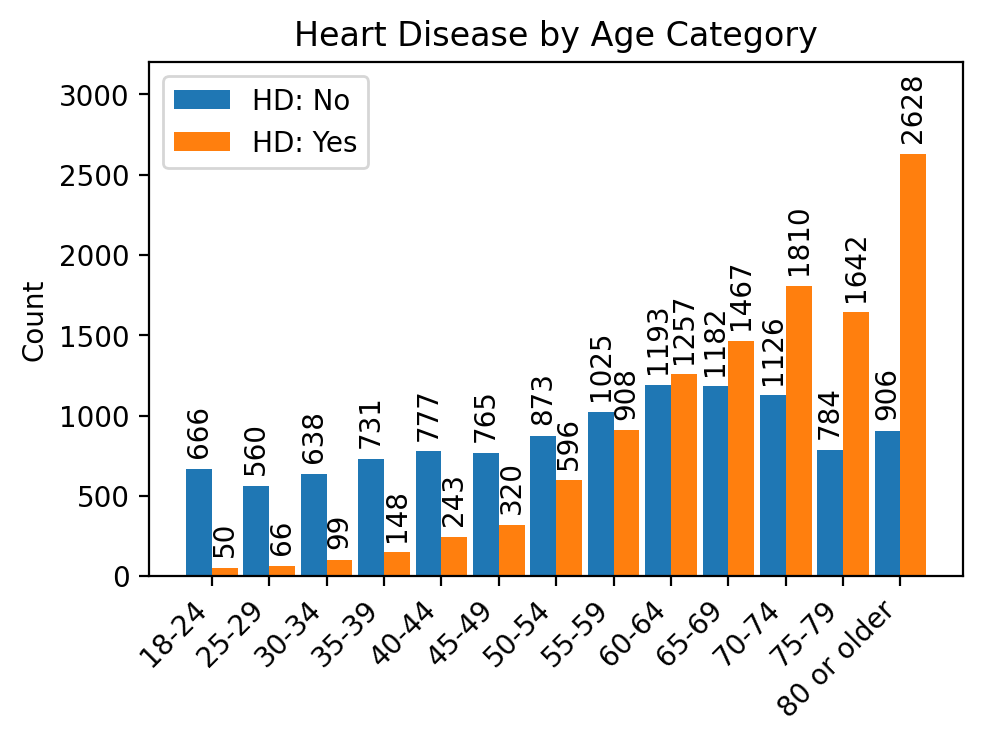

In [11]:
x = np.arange(len(age_categories))  # the label locations
width = 0.450  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in ages_count.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement.values(), width, label="HD: "+attribute)
    ax.bar_label(rects, padding=4, rotation=90)
    multiplier += 1
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Heart Disease by Age Category')
# 'ha' is just shorthand for horizontalalignment, which can also be used.
ax.set_xticks(x + width/2, age_categories, rotation=45, ha='right')
ax.legend(loc='upper left')
ax.set_ylim(0, 3200)
plt.show()

No                         9636
Yes                        1206
No, borderline diabetes     214
Yes (during pregnancy)      170
Name: Diabetic, dtype: int64
No                         7210
Yes                        3595
No, borderline diabetes     321
Yes (during pregnancy)      108
Name: Diabetic, dtype: int64


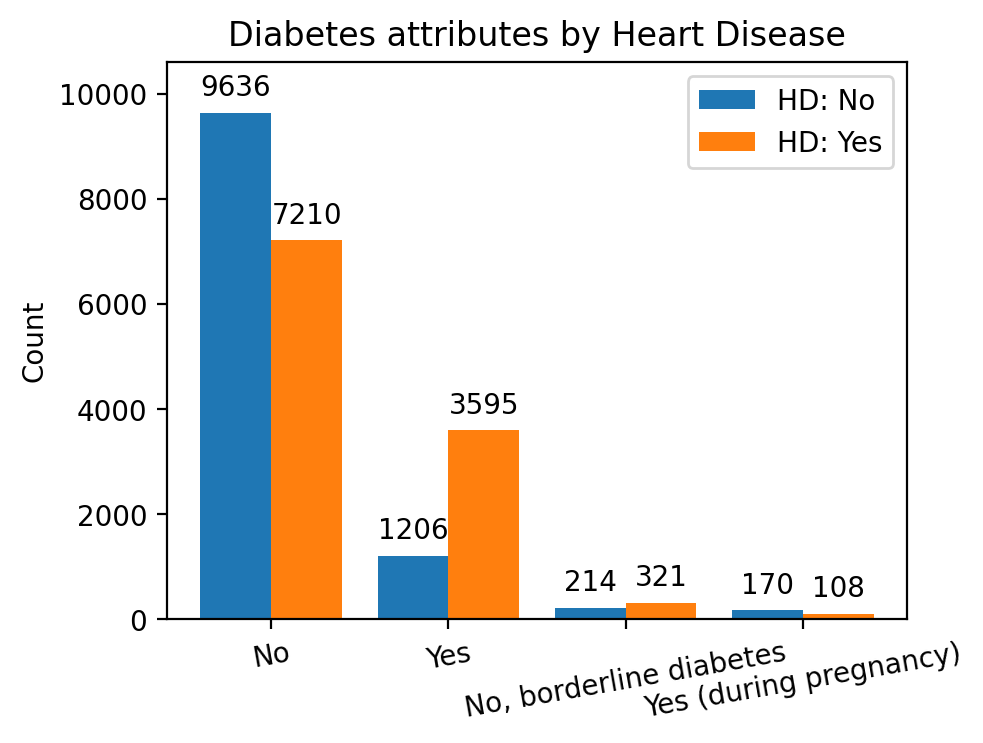

In [12]:
diabetes_types = w_heart_b["Diabetic"].unique()
heart_disease_options = w_heart_b["HeartDisease"].unique()
diabetes_count = {
    c: w_heart_b[w_heart_b["HeartDisease"] == c]["Diabetic"].value_counts() for c in heart_disease_options
}
x = np.arange(len(diabetes_types))  # the label locations
width = 0.40  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in diabetes_count.items():
    print(measurement)
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label="HD: "+attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Diabetes attributes by Heart Disease')
ax.set_xticks(x + width/2, diabetes_types, rotation=10)
ax.legend(loc='upper right')
ax.set_ylim(0, 10600)
plt.show()

(18.35, 18.43, 14.98)
(38.79, 48.83, 47.5)
(189.95, 195.82, 217.19)


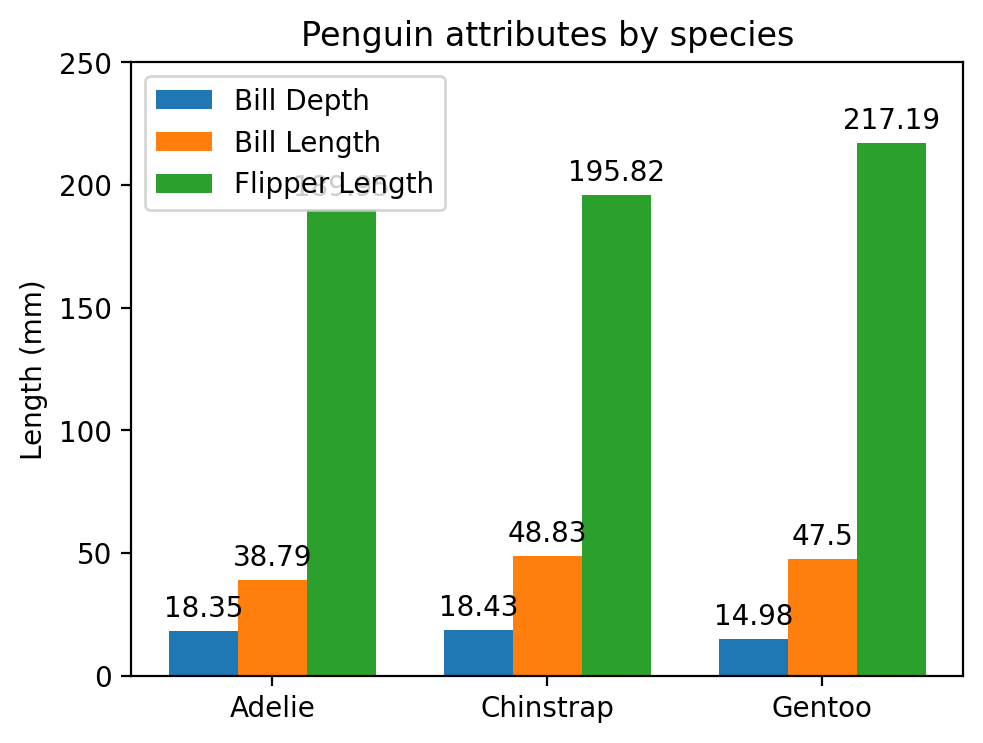

In [13]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in penguin_means.items():
    print(measurement)
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left')
ax.set_ylim(0, 250)

plt.show()

# Data engineering
## Data cleaning
The last output shows we have 16 columns plus one dependent column. No null values, 4 numeric values and 12 numerical features.
Those categories that have two posiblilities can be converted into booleans, those which not has to be transformed into multiple columns with one hot encoder.

In [14]:
w_heart_b.nunique()

HeartDisease           2
BMI                 1805
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             21
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [15]:
w_heart_b['Diabetic'].value_counts()

No                         16846
Yes                         4801
No, borderline diabetes      535
Yes (during pregnancy)       278
Name: Diabetic, dtype: int64

In [16]:
df = w_heart_b[w_heart_b.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

# Correlation of Characteristics
## Pearson's Coefficient

<AxesSubplot:>

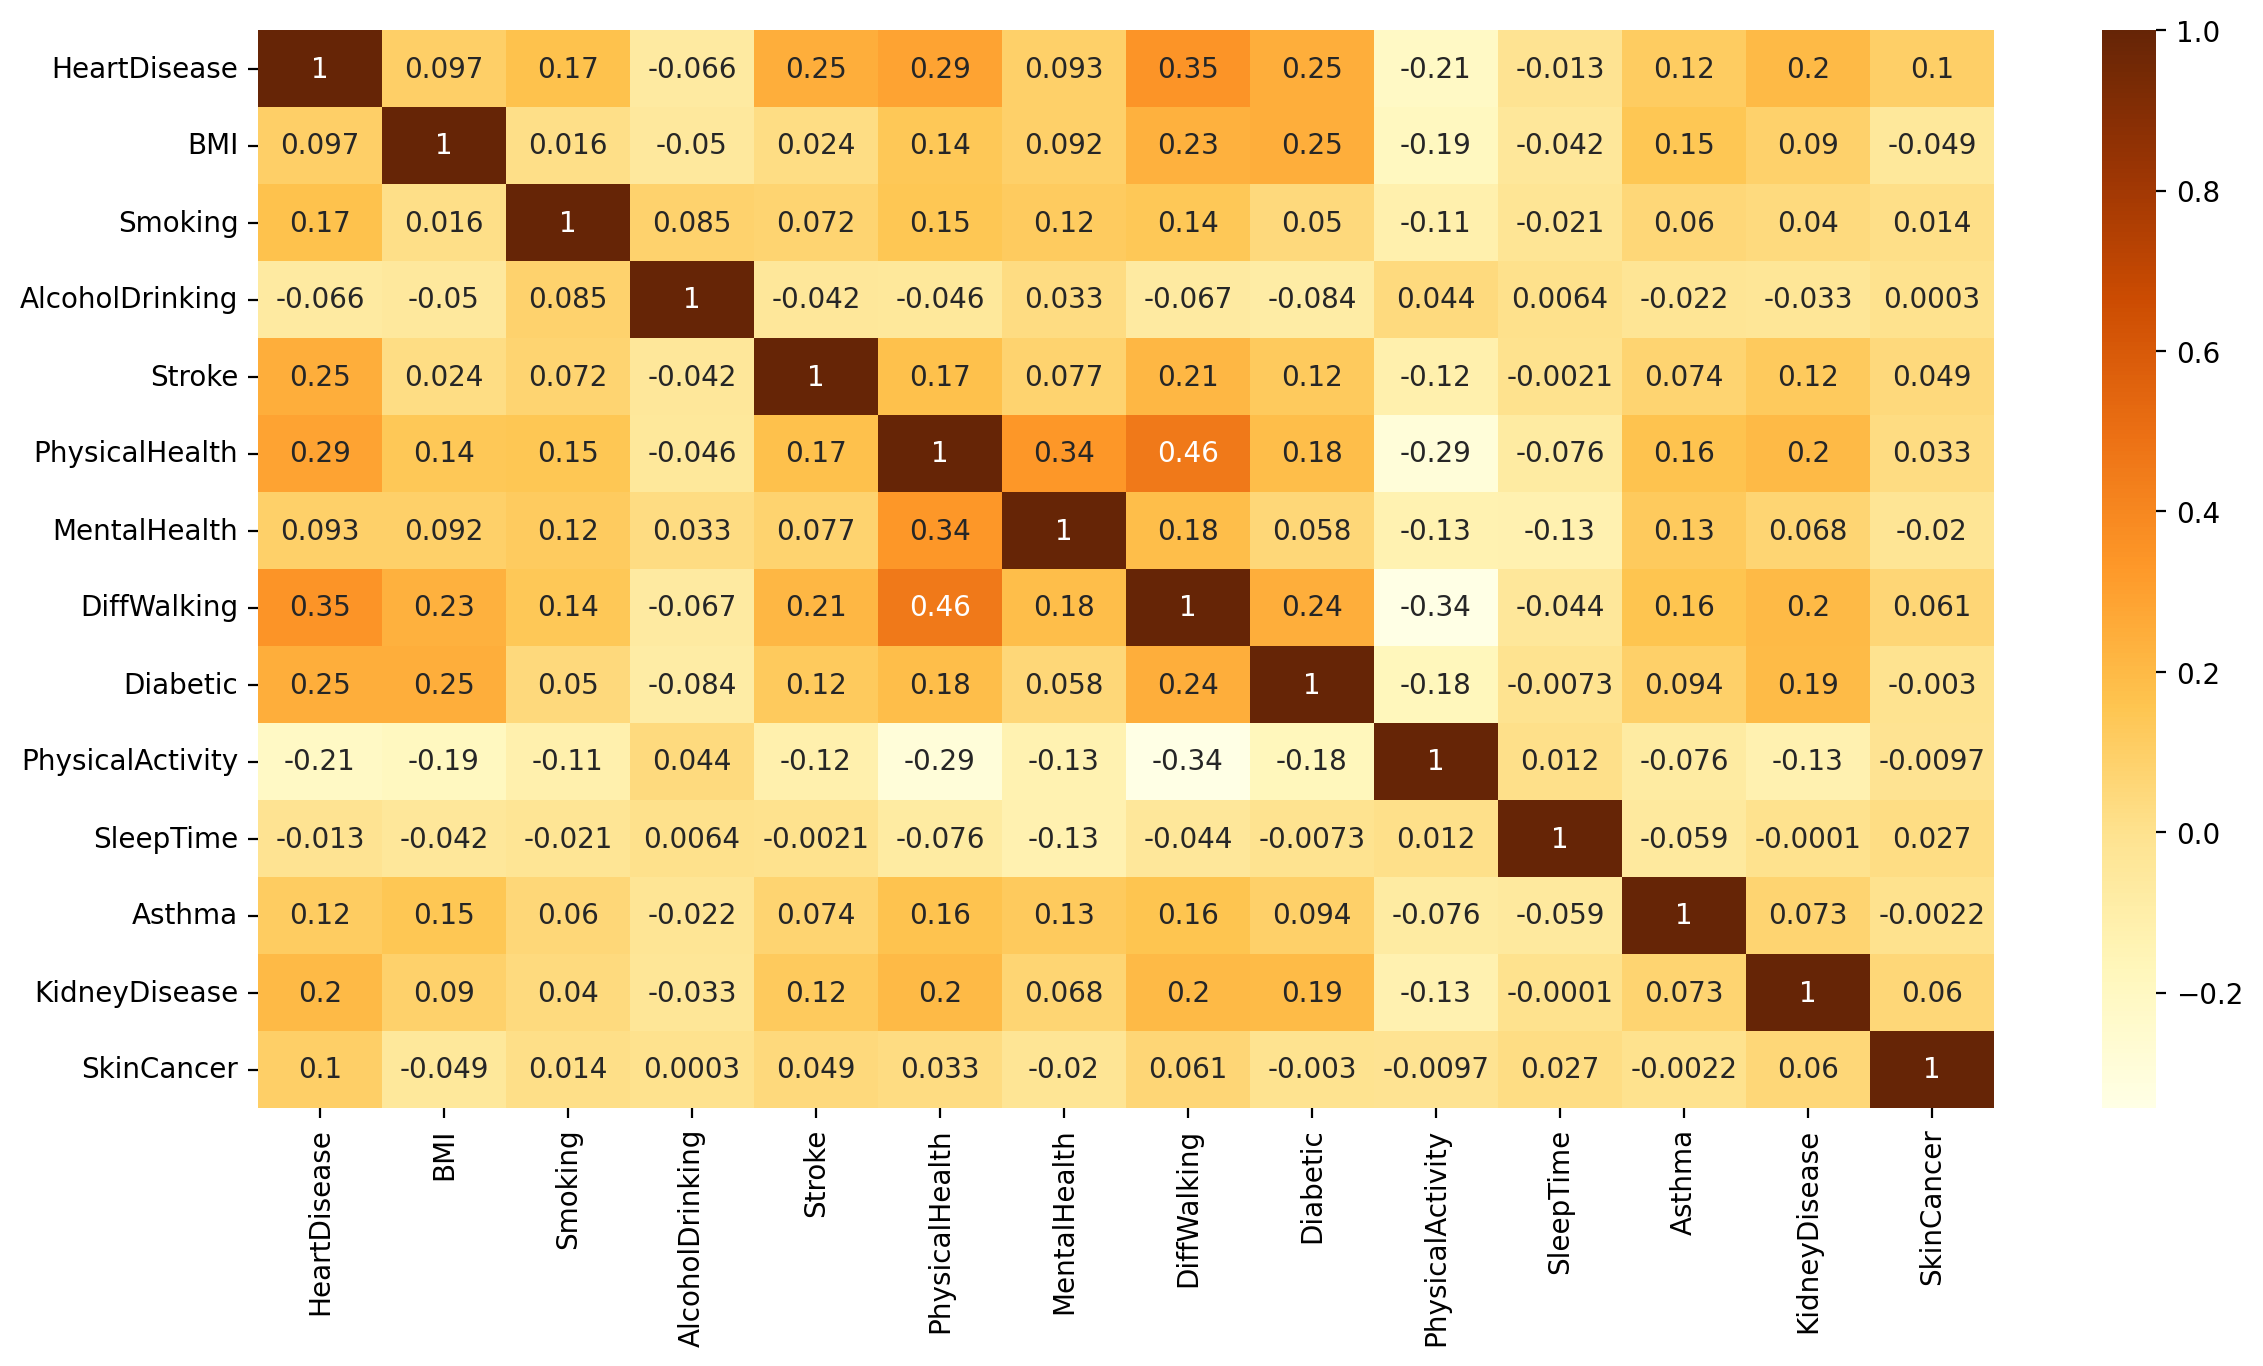

In [17]:
correlationP = df.corr(numeric_only = True).round(4)
plt.figure(figsize = (14,7))
sns.heatmap(correlationP, annot = True, cmap = 'YlOrBr')

## Kendall's Coefficient

<AxesSubplot:>

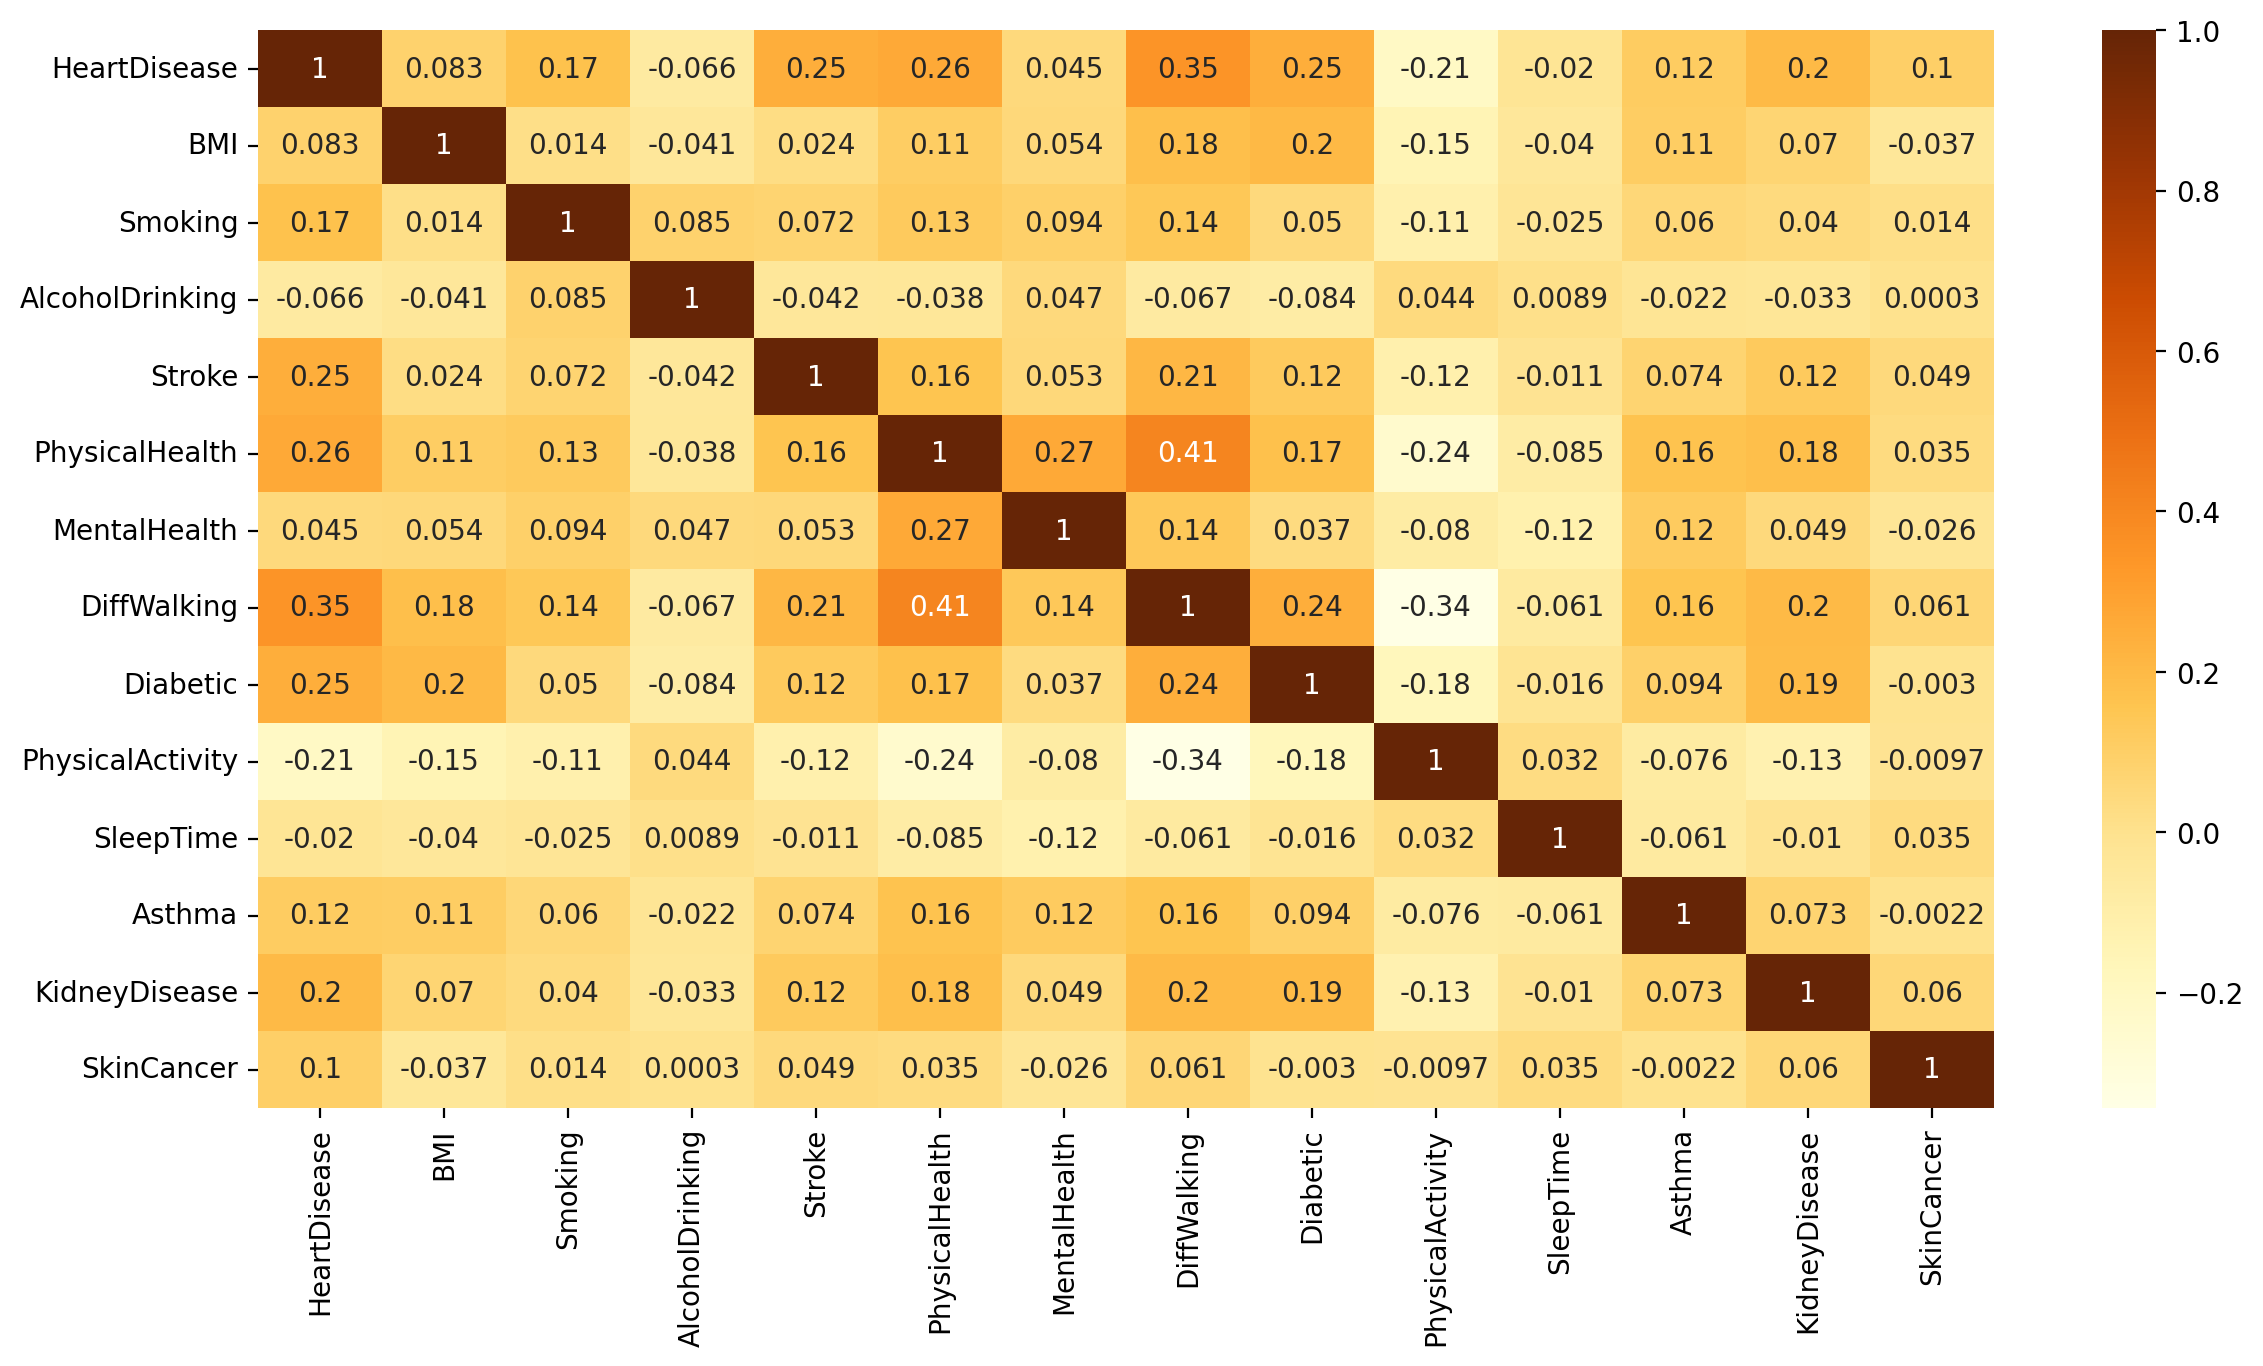

In [18]:
correlationK = df.corr(method = "kendall", numeric_only = True).round(4)
plt.figure(figsize = (14,7))
sns.heatmap(correlationK, annot = True, cmap = 'YlOrBr')

## Spearman's rank

In [19]:
correlationP = df.corr(method = "spearman", numeric_only = True).round(4)
plt.figure(figsize = (14,7))
correlationP.head()
#sns.heatmap(correlationP, annot = True, cmap = 'YlOrBr')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.0000,0.1009,0.1654,-0.0663,0.2471,0.2897,0.0489,0.3467,0.2475,-0.2093,-0.0224,0.1150,0.1984,0.0995
BMI,0.1009,1.0000,0.0170,-0.0504,0.0288,0.1448,0.0730,0.2188,0.2489,-0.1820,-0.0544,0.1343,0.0859,-0.0451
Smoking,0.1654,0.0170,1.0000,0.0850,0.0718,0.1399,0.1031,0.1426,0.0496,-0.1134,-0.0282,0.0596,0.0403,0.0141
AlcoholDrinking,-0.0663,-0.0504,0.0850,1.0000,-0.0419,-0.0413,0.0512,-0.0673,-0.0836,0.0441,0.0100,-0.0220,-0.0330,0.0003
Stroke,0.2471,0.0288,0.0718,-0.0419,1.0000,0.1702,0.0584,0.2097,0.1247,-0.1169,-0.0127,0.0740,0.1240,0.0493


<Figure size 1400x700 with 0 Axes>

## Pearson's Chi-Squared

In [20]:
# Data Frame
df = w_heart_b
# Column Names
all_cols = df.columns
# Create a new DF to store p-values
p_values = pd.DataFrame(index = all_cols, columns = all_cols)

 constructed a matrix to be filled with the chi-squared test p values

In [21]:
for i in range(len(all_cols)):
    for j in range(i+1, len(all_cols)):
        # Create a contingency table
        crosstab = pd.crosstab(df[all_cols[i]], df[all_cols[j]])
        # Perform the chi-squared test
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        if p < 0.002: p = 0.002
        # Store the p-value in the DataFrame
        p_values.iloc[i, j] = p
        p_values.iloc[j, i] = p

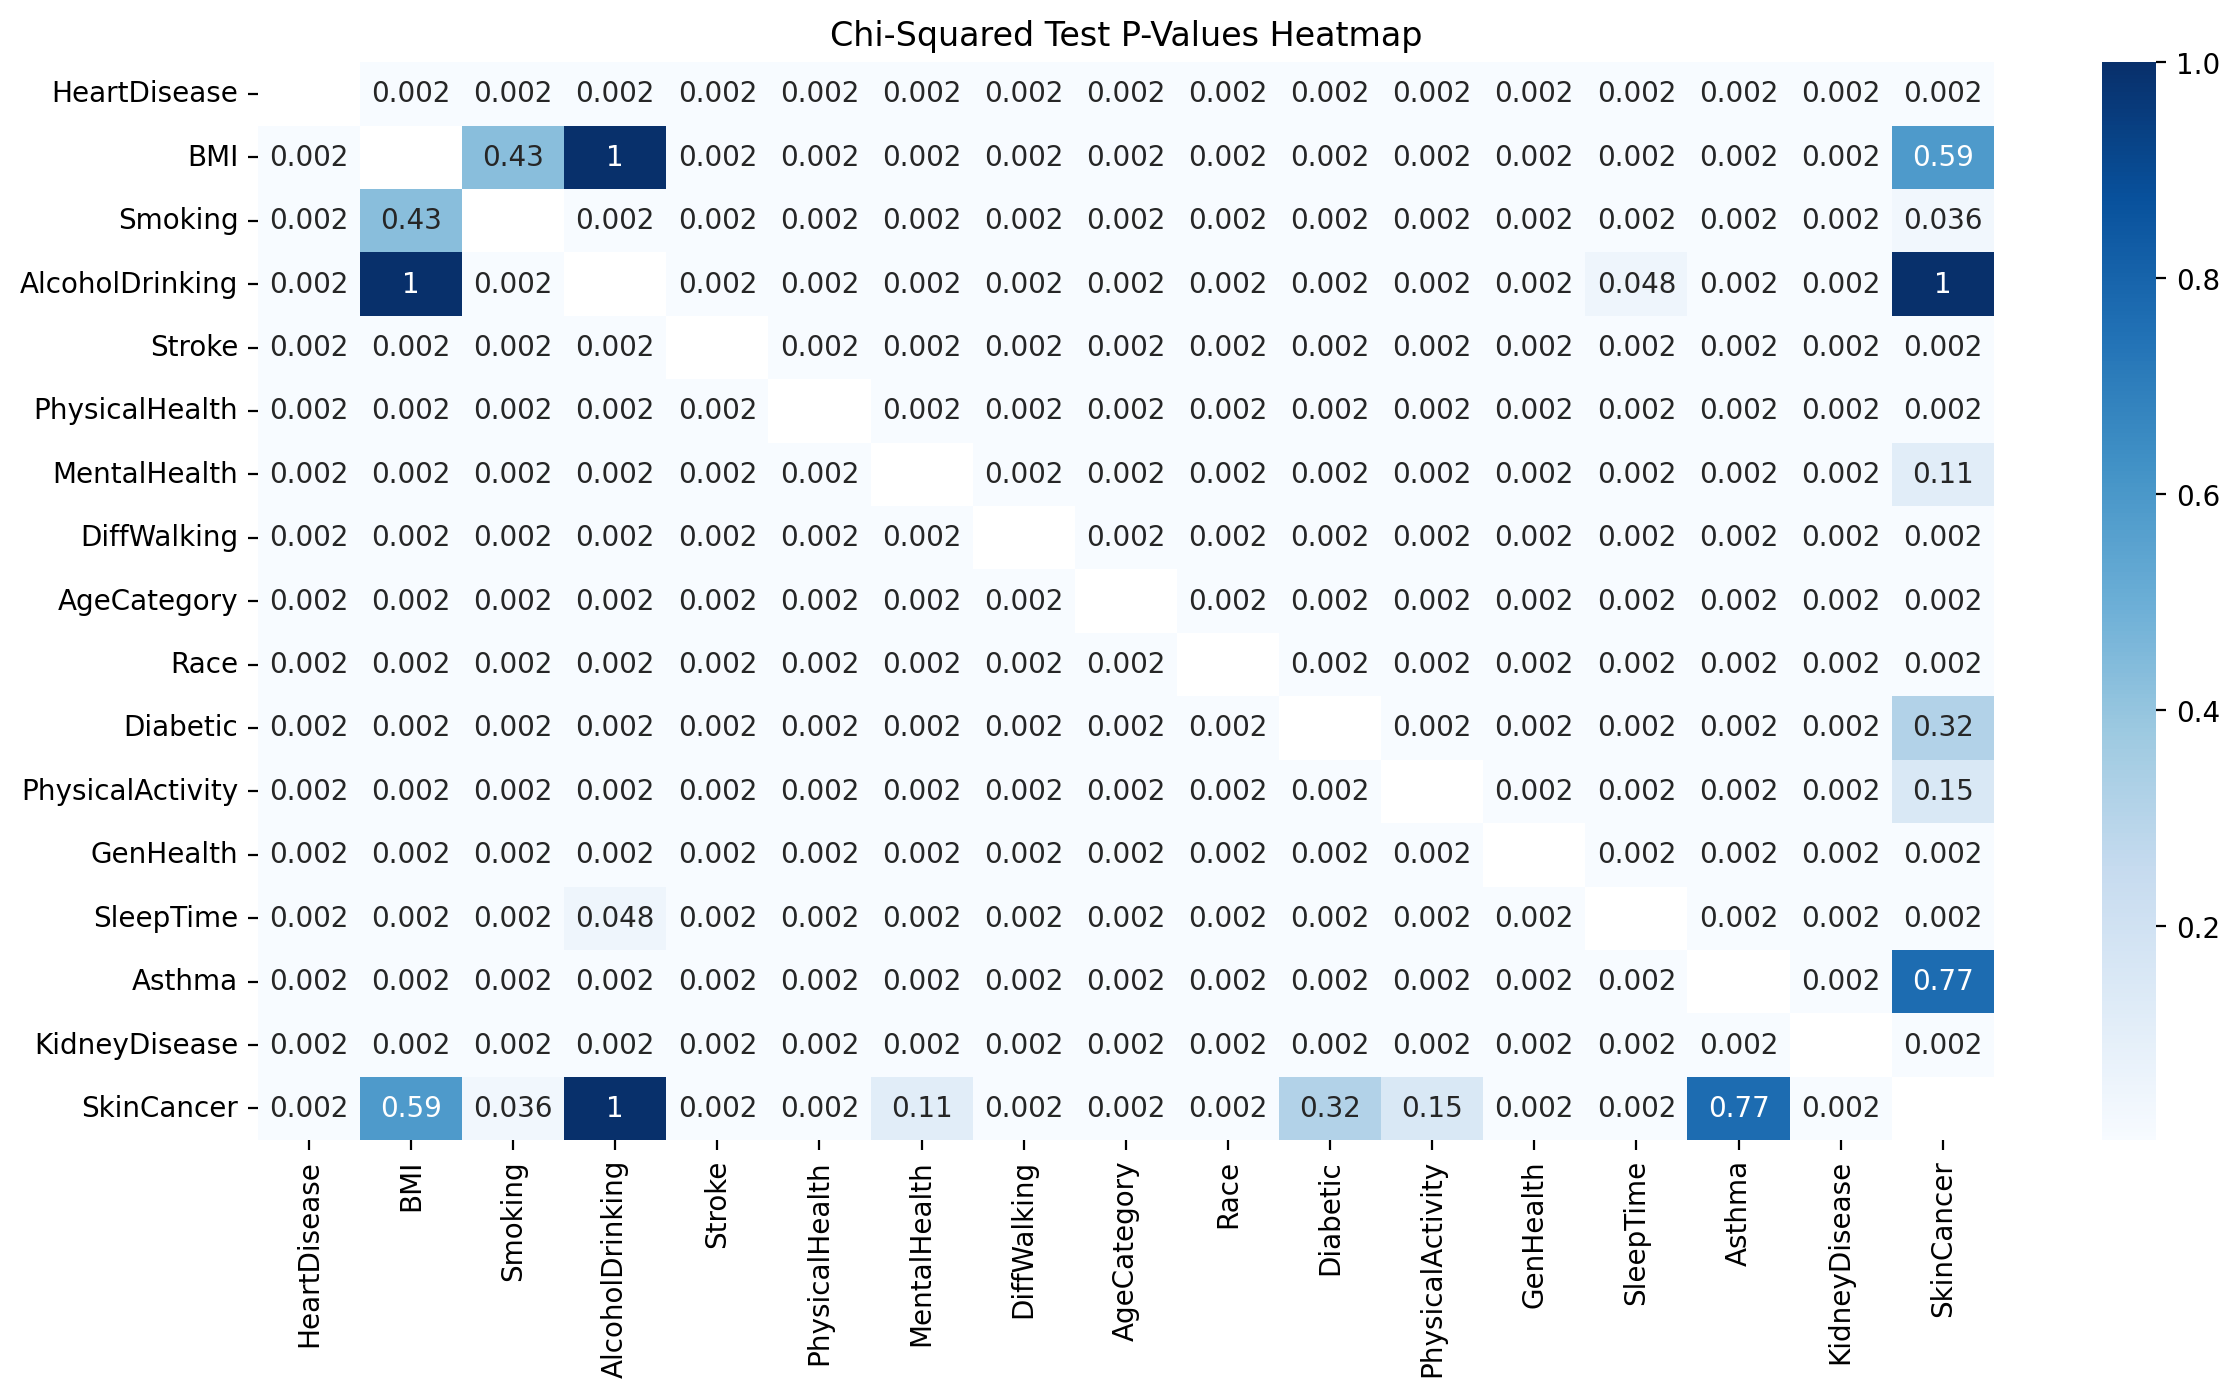

In [22]:
p_values = p_values.astype(float)
plt.figure(figsize=(14, 7))
sns.heatmap(p_values, annot=True, cmap='Blues')
plt.title('Chi-Squared Test P-Values Heatmap')
plt.show()

# Data preparation

In [23]:
# Reset 'df' to keep 'w_heart_b' intact and make modifications to the values
df = w_heart_b

### Filling missing values
Handling missing values is an essential data preprocessing task that can drastically deteriorate your model when not done with sufficient care.
- Do I have missing values?
- How are they expressed in the data?
- Should I withhold samples with missing values?
- Or should I replace them?
- If so, which values should they be replaced with?
### This dataset does not have any missing values
nothing is done in this step

https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

## Data Wrangling
- Data Balancing
- Clean
- Normalize
- Regularize
- Unbias (Detect Bias and mitigate bias)

# Data Preprocesing
1. Feature Extraction
    - Unstructured Data (Text, Images, Videos, Audio)
2. Feature Engineering
    - Create mew informative features by manipulating existing ones.
3. Feature Selection
    - Identify important features (Recursive Feature Selection, Forward FS)
4. Feature Transformation
    - Standar scaler, MinMaxScaler, Normalizer, PowerTransformer, LabelEncoder, OHE.
Data 

### Feature Extraction
Since there is not data such as large Text, Images or Audio: This step is skipped

### Feature Engineering

Which features can be created from existing data.

### Feature Selection
- Later we will use PCA (Principal Component Analysis) - Unsupervised
- This step might help with the [Curse of dimensionality]
- n_components: Ater procesing the impact of every variable, the process ends up with a new set of features or n components they recomend to use at least 3

In [24]:
# Encoding categorical variables
def encode_categorical_variables():
    global df
    # Nominal Variables - Labeled variables or groups
    nominal_features = ['HeartDisease', 'Race', ]
    # Ordinal Variables - Ranked variables where the order matters
    ordinal_features = ['']
    # First we start with Y, since _check_set_wise_labels uses pos_label=1
    df=df.astype({d: 'category' for d in df.select_dtypes(include='object')})
    # Instead of pos and neg
    df.HeartDisease.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
    # Transform Race into numeric values
    df.Race.replace(to_replace=['Other', 'Asian', 'White', 'Black', 'American Indian/Alaskan Native', 'Hispanic'],
                    value=[0, 1, 2, 3, 4, 5], inplace=True)
    # Transform AgeCategory into numeric values
    df.AgeCategory.replace(to_replace=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'], value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
    # Transform the class GenHealth into numeric values
    df.GenHealth.replace({ "Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4 }, inplace=True)
    # Transform the class Diabetic into numeric values
    df.Diabetic.replace({ "No": 0, "No, borderline diabetes": 1, "Yes (during pregnancy)": 2, "Yes": 3 }, inplace=True)
    # Transform the rest of the classes with objects from No and Yes to 0 and 1
    for f in df.columns:
        # Change all but the dependent variable
        if (df[f].dtype == 'category'):
            df[f].replace({ 'No': 0, 'Yes': 1 }, inplace=True)
encode_categorical_variables()

In [25]:
# Separamos todos los datos con las características y las etiquetas o resultados
#  eje 0 = filas, eje 1 = columnas  (segundo parámetro de función drop, el cual se denota como axis=)
# Select independent features
X = df.drop(columns=['HeartDisease']) # Variables independientes
# Select Target
y = df['HeartDisease'] # Variable dependiente [:, 0:8]

## Removing Features with low Variance
This is a simple baseline approach to feature selection. VarianceThreshold removes all features whose variance doesn't meet some threshold. Bu default it removes all zero-variance features i.e. features that have the same value in all samples.

In [26]:
# Scale the data
scaler = StandardScaler()
# Normalize the data
scaled = scaler.fit_transform(X)
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
print(sel.fit_transform(df).shape)
X.shape

(22460, 12)


(22460, 16)

It deleted 4 features from the dataset, next we'll see other methods

## Removing Features with Univariate Selection
This is a simple baseline approach to feature selection. SelectKBest is well suited to use a number of different statistical tests. Anova F value method is appropiate for numerical inputs and categorical data, as we see in the pima dataset, this can be used via the f_classif().  we wil select the 4 best feauteres using this method.

In [27]:
# Feature Extraction
k_best_test = SelectKBest(score_func=f_classif)
k_best_fit = k_best_test.fit(X, y)
# Summarize Scores
print(k_best_fit.scores_)

[2.15115492e+02 6.31572303e+02 9.91532645e+01 1.46080735e+03
 2.06203423e+03 1.95124703e+02 3.06737279e+03 4.18464059e+03
 1.82598247e+01 1.60022979e+03 1.02845696e+03 5.15929028e+03
 3.56649640e+00 3.00974335e+02 9.20484344e+02 2.24431881e+02]


In [28]:
# Sumarize selected features
features = k_best_fit.transform(X)
print(features)

[[ 0.  0.  1. ...  3.  0.  0.]
 [ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  0.  2. ...  3.  0.  0.]
 ...
 [ 0.  1. 30. ...  0.  1.  0.]
 [ 1.  0.  0. ...  2.  0.  0.]
 [ 1.  0.  0. ...  3.  1.  0.]]


## Recursive Feature Elimination

In [29]:
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(lr_model)
rfe_fit = rfe.fit(X, y)

In [30]:
nFeatures = rfe_fit.n_features_
selected_features = X.loc[:,rfe_fit.support_].columns.tolist()
fRanking = rfe_fit.ranking_
print("N Features:", nFeatures)
print("Selected Features:", selected_features)
print("Feature Ranking:", fRanking)

N Features: 8
Selected Features: ['Smoking', 'Stroke', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth', 'Asthma', 'KidneyDisease']
Feature Ranking: [8 1 2 1 6 7 1 1 9 1 4 1 5 1 1 3]


## PCA

In [31]:
# Create a new DataFrame object without the target column
# this is an unsupervised method
sliced = pd.DataFrame(df.drop(columns=['HeartDisease']))
# Normalize data
data_scaled = pd.DataFrame(preprocessing.scale(sliced), columns=sliced.columns)

In [32]:
# Search for n_componets
pca = decomposition.PCA()
pca.fit(data_scaled)

PCA()

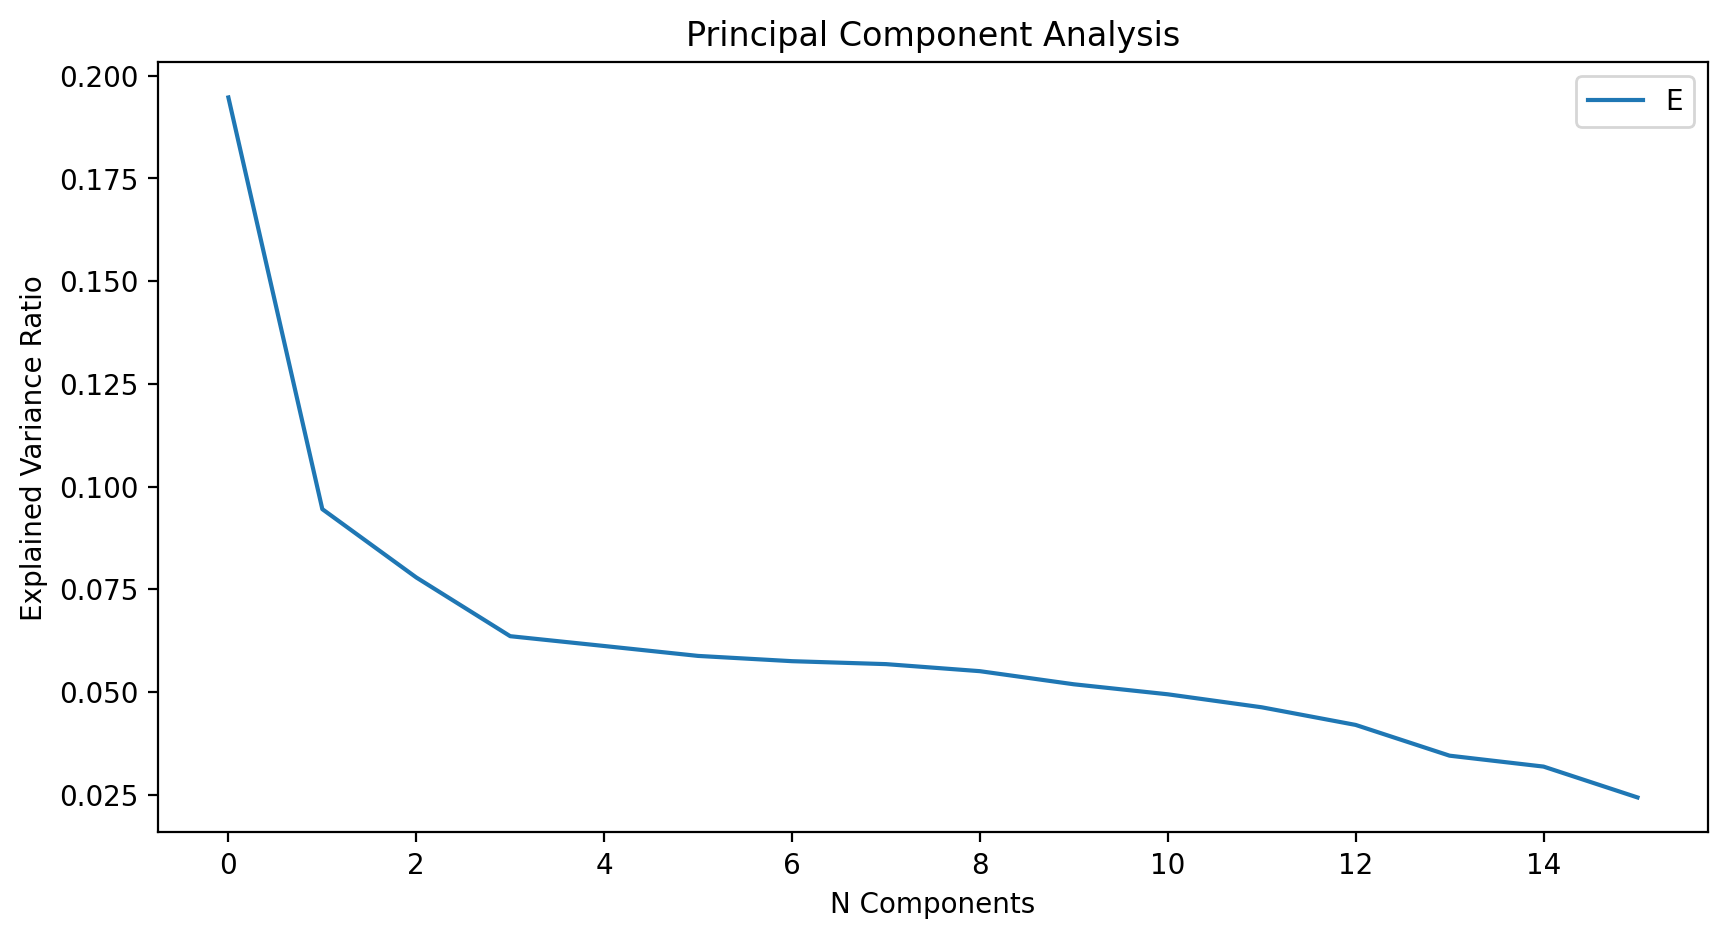

In [33]:
## Plot the result
plt.figure(figsize=(10, 5))
plt.title('Principal Component Analysis')
plt.plot(pca.explained_variance_ratio_)
plt.legend('Explained Variance')
plt.xlabel('N Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [34]:
# Set n_components = 95%
principal = decomposition.PCA(3)
principal.fit(data_scaled)
post_pca_array = principal.transform(data_scaled)

In [35]:
print(sliced.shape)
print(post_pca_array.shape)

(22460, 16)
(22460, 3)


In [36]:
# PCA indexes
#indexes = ['PC-'+str(i) for i in range(1, 4, 1)]
# Dump components relations with features
#print(pd.DataFrame(principal.components_, columns=data_scaled.columns, index = indexes))

In [37]:
# Discard unwanted columns and preserve only the selected features + Target Column
df=df[selected_features + ["HeartDisease"]]
selected_features

['Smoking',
 'Stroke',
 'DiffWalking',
 'AgeCategory',
 'Diabetic',
 'GenHealth',
 'Asthma',
 'KidneyDisease']

### Data selection

In [38]:
# Rows selection
print(df.shape[0])
# To improve timea a stratified split is needed with only N observations
n = 2000
df=df.groupby('HeartDisease', group_keys=False).apply(lambda x: x.sample(int(np.rint(n*len(x)/len(df))))).sample(frac=1).reset_index(drop=True)
print(df.shape[0])
print(df.groupby('HeartDisease').size())

22460
2000
HeartDisease
0    1000
1    1000
dtype: int64


In [39]:
# Recreate the X and y Variables
X = df.drop(columns=['HeartDisease']) # Select independent features
y = df['HeartDisease'] # Select Target

ver vuales variables me dan mas informacion 

# Train and Tune
## Split Dataset for Training and Testing

In [40]:
def split_train_test():
    # Separo los datos de "train" en entrenamiento y prueba
    # para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))
    # Set Training and Testing Data
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_train_test()

Son 1600 datos para entrenamiento y 400 datos para prueba


## Algorithm Selection
- Experiments
- Trials (Trial Components)
Support Vector Machine is not suitable for large datasets because of its high training time and also takes more time in training compared with naive bayes, but it also offers bod accuracy and perform faster predictions, use less memory and works well wit a clear margin of separation and a high dimensional space.

In [41]:
# Building a model using SVM Classifier
svc = SVC(probability=True)

- Feature Importance
- Transformation
- Encoding
- Joining

## Helper Functions

In [42]:
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)
    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    # Show results
    print('Accuracy:', acc)
    print('Precision:', prec)
    print('Recall:', rec)
    print('F1 Score:', f1)
    print('Cohens Kappa Score:', kappa)
    print('Area Under Curve:', auc)
    return cm

In [43]:
def plot_cm(cm):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    plt.show()

## Model Training

In [44]:
svc.fit(X_train, y_train)
# Evaluate Model
cm = evaluate_model(svc, X_test, y_test)

Accuracy: 0.77
Precision: 0.7317073170731707
Recall: 0.8021390374331551
F1 Score: 0.7653061224489797
Cohens Kappa Score: 0.5407462872831648
Area Under Curve: 0.842547262182722


### Confusion Matrix

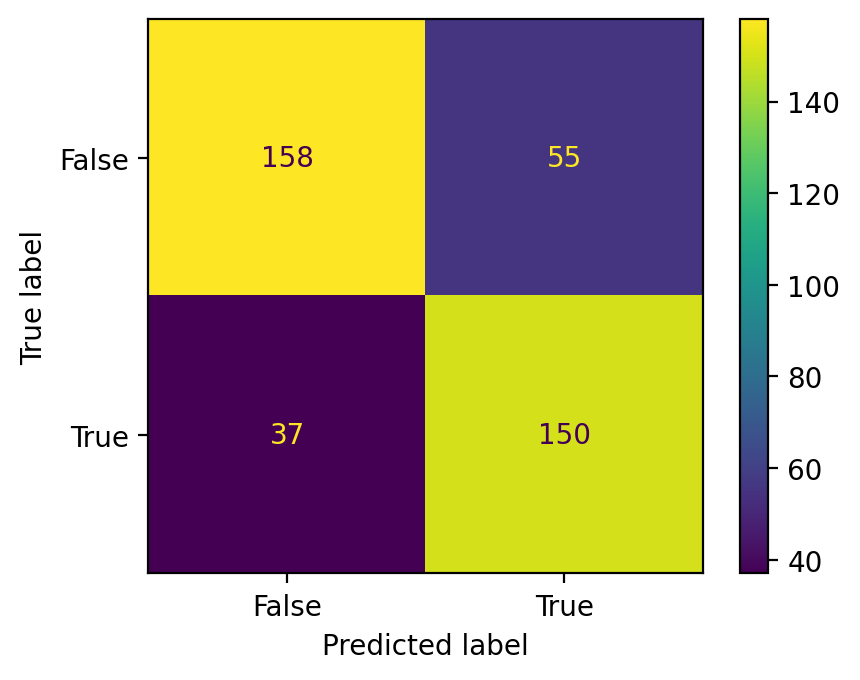

In [45]:
plot_cm(cm)

## Metrics Validation
### Hyper-param tuning
For SMC, the hyperparameters are:
- C: Penalty for missclassified data point during training process:
    - Small: Larger margin=Leads to more missclassification.
    - Larger: More emphasis on minimizing training error, potentially leading overfitting: narrower margin.
- Gamma: Considers how many points to consider in the separation line:
    - Low: Loosely fit the dataset, considers only nerby points in calculating the separation line.
    - High: Fit the training dataset, which causes overfitting, considering all points in the calculation.
    - Sckit Gamma is calculated with the scale ecuation:
    $$gamma=(1/n\_features*X.var())$$
- Tol: Tolerance for stopping criterion:
    - High: Stops with little changes
    - Low: Stops until enough changes
    - Default: 1e-3
- Kernel: Feature rescaling, it transform the given dataset input to te required form:
    - linear
    - polynomial
    - radial basis function
#### Reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://www.baeldung.com/cs/ml-svm-c-parameter
- https://stackabuse.com/understanding-svm-hyperparameters/

### Grid Search

In [46]:
param_grid = {
    "C": [8, 16, 24, 32, 40, 48],
    "gamma": [1e-5, 1e-4, 1e-3],
    "tol": [2e-5, 3e-4],
    "kernel": ['rbf'],
}
# Grid search with cross validation
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring="f1", # For both precision and recall
    verbose=1,
    cv=5, # Cross Validation
    # retreturn_train_score=True
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [8, 16, 24, 32, 40, 48],
                         'gamma': [1e-05, 0.0001, 0.001], 'kernel': ['rbf'],
                         'tol': [2e-05, 0.0003]},
             scoring='f1', verbose=1)

In [47]:
best_model = grid_search.best_estimator_
print('The best model was:', grid_search.best_estimator_)
print('The best parameter values were:', grid_search.best_params_)
print('The best selected score was:', grid_search.best_score_)

The best model was: SVC(C=32, gamma=0.0001, probability=True, tol=2e-05)
The best parameter values were: {'C': 32, 'gamma': 0.0001, 'kernel': 'rbf', 'tol': 2e-05}
The best selected score was: 0.7627804257797793


In [48]:
cm = evaluate_model(best_model, X_test, y_test)

Accuracy: 0.775
Precision: 0.7389162561576355
Recall: 0.8021390374331551
F1 Score: 0.7692307692307693
Cohens Kappa Score: 0.5504383226354305
Area Under Curve: 0.843049383645904


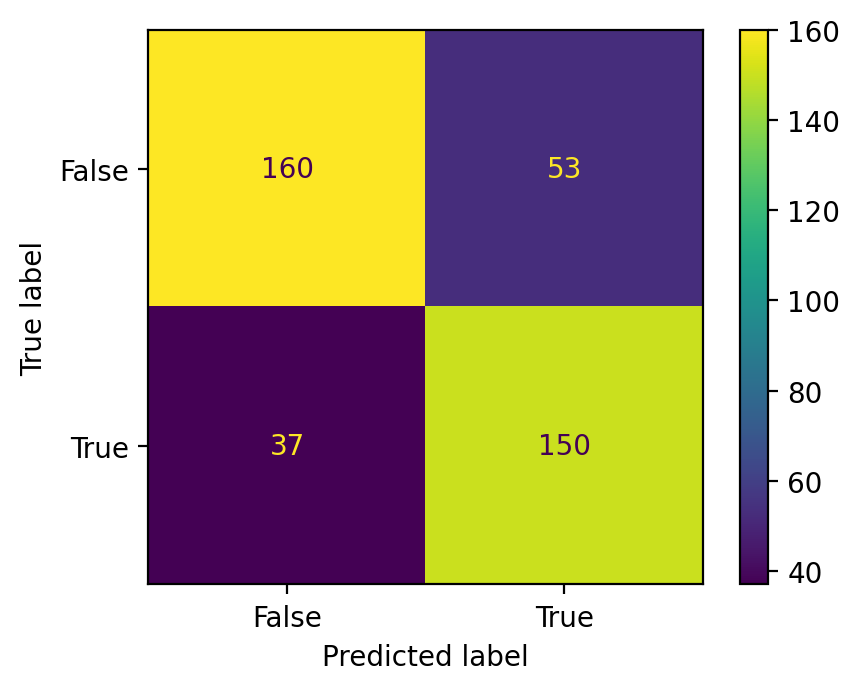

In [49]:
plot_cm(cm)

### Random Search

In [50]:
param_dist = {
    "C": np.arange(32, 48, 1),
    "gamma": np.arange(1e-5, 1e-3, 5e-5),
    "tol": np.arange(2e-6, 2e-4, 1e-6),
    "kernel": ['rbf'],   
}
# Grid search with cross validation
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    scoring="f1", # For both precision and recall
    verbose=1,
    cv=5,
    n_iter=30
    # retreturn_train_score=True
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_iter=30,
                   param_distributions={'C': array([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
                                        'gamma': array([1.0e-05, 6.0e-05, 1.1e-04, 1.6e-04, 2.1e-04, 2.6e-04, 3.1e-04,
       3.6e-04, 4.1e-04, 4.6e-04, 5.1e-04, 5.6e-04, 6.1e-04, 6.6e-04,
       7.1e-04, 7.6e-04, 8.1e-04, 8.6e-04, 9.1e-04, 9.6e-04]),
                                        'kernel': ['rbf'],
                                        'tol': ar...
       1.64e-04, 1.65e-04, 1.66e-04, 1.67e-04, 1.68e-04, 1.69e-04,
       1.70e-04, 1.71e-04, 1.72e-04, 1.73e-04, 1.74e-04, 1.75e-04,
       1.76e-04, 1.77e-04, 1.78e-04, 1.79e-04, 1.80e-04, 1.81e-04,
       1.82e-04, 1.83e-04, 1.84e-04, 1.85e-04, 1.86e-04, 1.87e-04,
       1.88e-04, 1.89e-04, 1.90e-04, 1.91e-04, 1.92e-04, 1.93e-04,
       1.94e-04, 1.95e-04, 1.96e-04, 1.97e-04, 1.98e-04, 1.99e-04,
       2.00e-04])},
                   scoring='f1', verbose=1)

In [51]:
best_model = random_search.best_estimator_
best_parameters = random_search.best_params_
best_f1 = random_search.best_score_
print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: SVC(C=45, gamma=6e-05, probability=True, tol=7.300000000000001e-05)
The best parameter values were: {'tol': 7.300000000000001e-05, 'kernel': 'rbf', 'gamma': 6e-05, 'C': 45}
The best f1-score was: 0.7597065087839914


In [52]:
cm = evaluate_model(best_model, X_test, y_test)

Accuracy: 0.775
Precision: 0.7389162561576355
Recall: 0.8021390374331551
F1 Score: 0.7692307692307693
Cohens Kappa Score: 0.5504383226354305
Area Under Curve: 0.8428736411337902


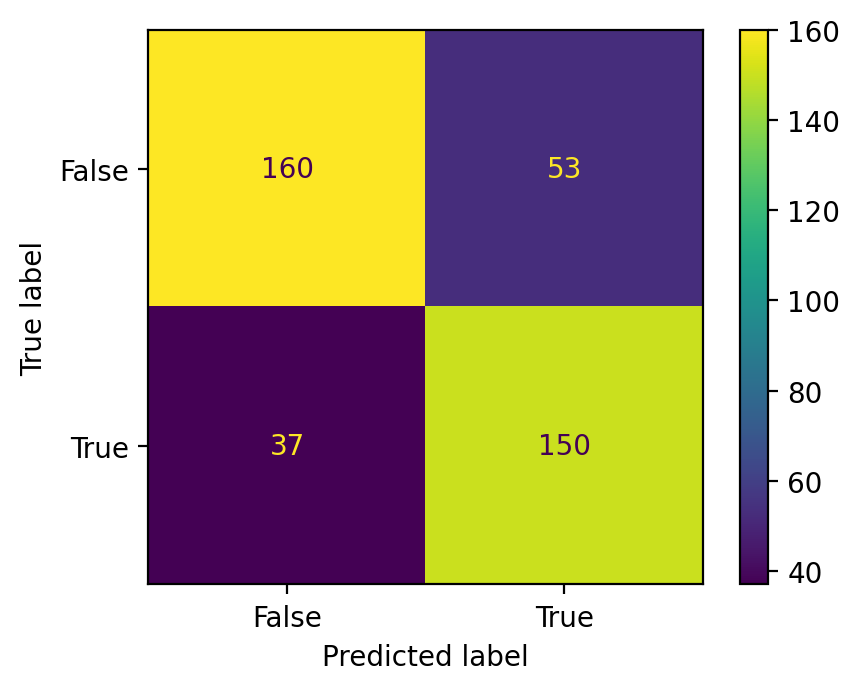

In [53]:
plot_cm(cm)

## Random with pipelines

In [58]:
# Return the dataframe to its initial state
df = w_heart_b[selected_features + ["HeartDisease"]].copy()

In [59]:
df.HeartDisease.replace(to_replace=['No', 'Yes'],value=[0, 1],inplace=True)

In [60]:
# Recreate the X and y Variables
X = df.drop(columns=['HeartDisease']) # Select the independent feature
y = df['HeartDisease'] # Select Target
# Rerun the data split X and y step
X_train, X_test, y_train, y_test = split_train_test()

Son 17968 datos para entrenamiento y 4492 datos para prueba


In [61]:
# Encoding - Transformations
num_features = []
cat_features = [
    'Smoking',
    'Stroke',
    'DiffWalking',
    'Asthma',
    'KidneyDisease',
               ]
# Categories
age_categories = ['18-24', '25-29',
                  '30-34', '35-39',
                  '40-44', '45-49',
                  '50-54', '55-59',
                  '60-64', '65-69',
                  '70-74', '75-79',
                  '80 or older']
health_categories = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
diabetic_categories = ['No', 'No, borderline diabetes', 'Yes (during pregnancy)', 'Yes']
general_categories = ['No', 'Yes']
# Define your data preprocessing steps
transformer = make_column_transformer(
    # Numerical Transformer
    # Categorical Transformer
    (OrdinalEncoder(categories=[age_categories]), ['AgeCategory']),
    (OrdinalEncoder(categories=[health_categories]), ['GenHealth']),
    (OrdinalEncoder(categories=[diabetic_categories]), ['Diabetic']),
    
    (OrdinalEncoder(categories='auto'), cat_features),
    
    remainder='passthrough',
).set_output(transform="pandas")
pca = decomposition.PCA()
classifier = pipeline.Pipeline(steps=[
    ('transformer', transformer),
    ('pca', pca),
    ('svc', svc)
])

In [62]:
transformer.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder-1',
                                 OrdinalEncoder(categories=[['18-24', '25-29',
                                                             '30-34', '35-39',
                                                             '40-44', '45-49',
                                                             '50-54', '55-59',
                                                             '60-64', '65-69',
                                                             '70-74', '75-79',
                                                             '80 or older']]),
                                 ['AgeCategory']),
                                ('ordinalencoder-2',
                                 OrdinalEncoder(categories=[['Poor', 'Fair',
                                                             'Good',
                                                             'Very good',
                                                             'Excellent']]),
                                 ['GenHealth']),
                                ('ordinalencoder-3',
                                 OrdinalEncoder(categories=[['No',
                                                             'No, borderline '
                                                             'diabetes',
                                                             'Yes (during '
                                                             'pregnancy)',
                                                             'Yes']]),
                                 ['Diabetic']),
                                ('ordinalencoder-4', OrdinalEncoder(),
                                 ['Smoking', 'Stroke', 'DiffWalking', 'Asthma',
                                  'KidneyDisease'])])

In [63]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['18-24',
                                                                              '25-29',
                                                                              '30-34',
                                                                              '35-39',
                                                                              '40-44',
                                                                              '45-49',
                                                                              '50-54',
                                                                              '55-59',
                                                                              '60-64',
                                                                              '65-69',
                                                                              '70-74',
                                                                              '75-79',
                                                                              '80 '
                                                                              'or '
                                                                              'older']]),
                                                  ['AgeCategory']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['Poor',
                                                                              'Fair',
                                                                              'Good',
                                                                              'Very '
                                                                              'good',
                                                                              'Excellent']]),
                                                  ['GenHealth']),
                                                 ('ordinalencoder-3',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'No, '
                                                                              'borderline '
                                                                              'diabetes',
                                                                              'Yes '
                                                                              '(during '
                                                                              'pregnancy)',
                                                                              'Yes']]),
                                                  ['Diabetic']),
                                                 ('ordinalencoder-4',
                                                  OrdinalEncoder(),
                                                  ['Smoking', 'Stroke',
                                                   'DiffWalking', 'Asthma',
                                                   'KidneyDisease'])])),
                ('pca', PCA()), ('svc', SVC(probability=True))])

In [65]:
param_dist = {
    'pca__n_components': np.arange(0.95, 0.98, .1),
    "svc__C": np.arange(1,30,1),
    # "gamma": [0.0001, 1, 10],
}
# Random search with cross validation and a pipeline 
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_dist,
    scoring="f1", # For both precision and recall
    verbose=5,
    cv=5,
    n_iter=2,
# retreturn_train_score=True
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .pca__n_components=0.95, svc__C=22;, score=0.747 total time=  19.9s
[CV 2/5] END .pca__n_components=0.95, svc__C=22;, score=0.759 total time=  19.9s
[CV 3/5] END .pca__n_components=0.95, svc__C=22;, score=0.756 total time=  20.0s
[CV 4/5] END .pca__n_components=0.95, svc__C=22;, score=0.757 total time=  20.0s
[CV 5/5] END .pca__n_components=0.95, svc__C=22;, score=0.762 total time=  20.4s
[CV 1/5] END .pca__n_components=0.95, svc__C=27;, score=0.746 total time=  21.3s
[CV 2/5] END .pca__n_components=0.95, svc__C=27;, score=0.760 total time=  21.7s
[CV 3/5] END .pca__n_components=0.95, svc__C=27;, score=0.755 total time=  21.6s
[CV 4/5] END .pca__n_components=0.95, svc__C=27;, score=0.757 total time=  20.8s
[CV 5/5] END .pca__n_components=0.95, svc__C=27;, score=0.762 total time=  21.5s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ordinalencoder-1',
                                                                               OrdinalEncoder(categories=[['18-24',
                                                                                                           '25-29',
                                                                                                           '30-34',
                                                                                                           '35-39',
                                                                                                           '40-44',
                                                                                                           '45-49',
                                                                                                           '50-54',
                                                                                                           '55-59',
                                                                                                           '60-64',
                                                                                                           '65-69',
                                                                                                           '70-74',
                                                                                                           '75-79',
                                                                                                           '80 '
                                                                                                           'or '
                                                                                                           'older']]),
                                                                               ['AgeCategory']),
                                                                              ('ordinalencoder-2',
                                                                               OrdinalEncoder(categories=[['...
                                                                                                           'Yes']]),
                                                                               ['Diabetic']),
                                                                              ('ordinalencoder-4',
                                                                               OrdinalEncoder(),
                                                                               ['Smoking',
                                                                                'Stroke',
                                                                                'DiffWalking',
                                                                                'Asthma',
                                                                                'KidneyDisease'])])),
                                             ('pca', PCA()),
                                             ('svc', SVC(probability=True))]),
                   n_iter=2,
                   param_distributions={'pca__n_components': array([0.95]),
                                        'svc__C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
                   scoring='f1', verbose=5)

In [66]:
best_model = random_search.best_estimator_
best_parameters = random_search.best_params_
best_f1 = random_search.best_score_
print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)
print('The best f1-score was:', best_f1)

The best model was: Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(categories=[['18-24',
                                                                              '25-29',
                                                                              '30-34',
                                                                              '35-39',
                                                                              '40-44',
                                                                              '45-49',
                                                                              '50-54',
                                                                              '55-59',
                                                                              '60-64',
                                   

In [67]:
cm = evaluate_model(best_model, X_test, y_test)

Accuracy: 0.7473285841495992
Precision: 0.7245101959216314
Recall: 0.8024800708591674
F1 Score: 0.761504517755831
Cohens Kappa Score: 0.494350441618453
Area Under Curve: 0.8051024983883028


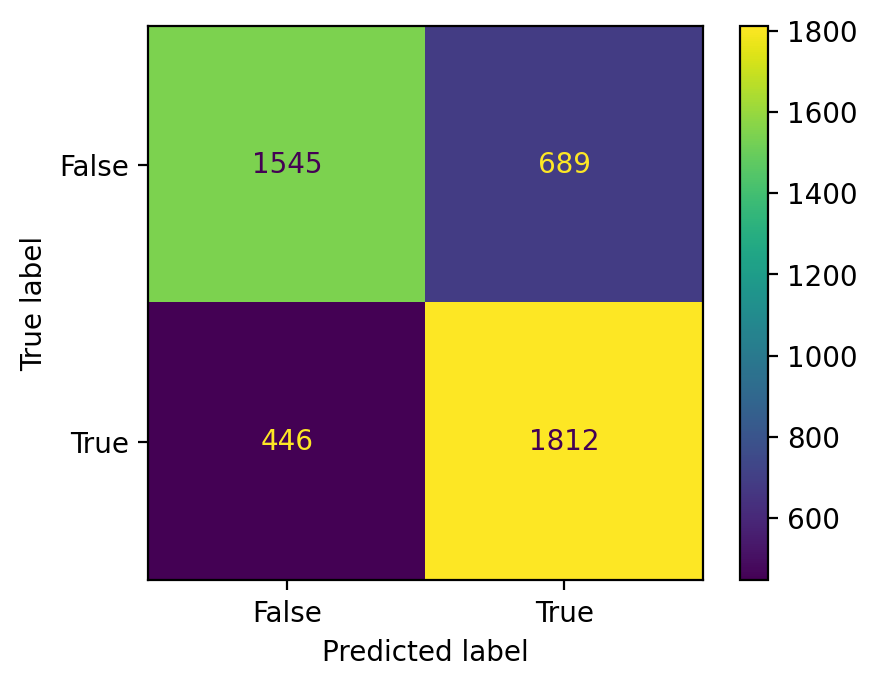

In [68]:
plot_cm(cm)

In [2]:
best_model.save()

AttributeError: 'Pipeline' object has no attribute 'save'

Fast?
https://youtube.com/shorts/2O3dzzrhpRw?si=7-QPes16ypNpvA7r